<PIL.Image.Image image mode=F size=128x120 at 0x2ACEDBEFF28>


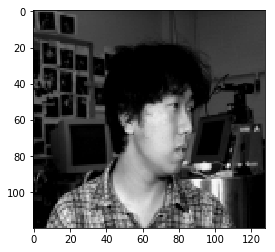

In [24]:
from pathlib import Path
import pgm2pil

fname = 'datasets/faces/an2i/an2i_left_neutral_open.pgm'
an2i = Path( fname )
an2i.exists()

import PIL.Image
#origImageOpen = PIL.Image.open
#PIL.Image.open = pgm2pil.imageOpenWrapper
an2i_im = PIL.Image.open(fname)
print(an2i_im)

# or we can use the misc package that in turn uses PIL
from scipy import misc
an2i_im = misc.imread(fname)

import importlib
# importlib.reload(pgm2pil)


# not needed anymore changed pgm2pil
# import numpy as np
# an2i_im_up = np.flipud(an2i_im)

import matplotlib.pyplot as plt

# make it non-blocking -- only needed once
plt.ion() 

plt.imshow(an2i_im, cmap=plt.cm.gray)
# Only needed if blocking
#plt.show()

In [25]:
print(len(an2i_im))
print(len(an2i_im[119]))
print(an2i_im[0])

TypeError: object of type 'Image' has no len()